In [1]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import and_

from api import query
from models.Style import Style
from utils.S3Handler import S3Handler

%matplotlib inline

## run new query

In [2]:
# select filters
filters=[Style.gender == "Unisex",
        #Style.articleType == "Watches",
        Style.year >= 2013]

In [7]:
# run query
run_id, items = query.run_query(Style, filters, limit=10, upload_to_s3=True)

0it [00:00, ?it/s]

run_id: 7697def5-ccf2-415b-be15-6c6056600a19
running query
items count: 10 | query took 0.00018477439880371094 seconds
uploading 10 items to s3


10it [00:01,  5.50it/s]

uploaded all items! | it took 1.8213014602661133 seconds
DONE! 7697def5-ccf2-415b-be15-6c6056600a19 | it took 1.8236279487609863 seconds


## list query results

In [8]:
s3_handler = S3Handler()

#TODO: update run_id!
results = s3_handler.list_dir(run_id) 


In [9]:
#read data from s3 to pandas dataframe
dfs = []

for obj in results:
    print(obj.key)
    file_body = obj.get()['Body'].read()
    data = json.loads(file_body)
    dfs.append(pd.json_normalize(data))
    
df = pd.concat(dfs, sort=False)
    

query_results/7697def5-ccf2-415b-be15-6c6056600a19/13841.json
query_results/7697def5-ccf2-415b-be15-6c6056600a19/19918.json
query_results/7697def5-ccf2-415b-be15-6c6056600a19/19920.json
query_results/7697def5-ccf2-415b-be15-6c6056600a19/22950.json
query_results/7697def5-ccf2-415b-be15-6c6056600a19/4716.json
query_results/7697def5-ccf2-415b-be15-6c6056600a19/51693.json
query_results/7697def5-ccf2-415b-be15-6c6056600a19/51694.json
query_results/7697def5-ccf2-415b-be15-6c6056600a19/5253.json
query_results/7697def5-ccf2-415b-be15-6c6056600a19/5254.json
query_results/7697def5-ccf2-415b-be15-6c6056600a19/8746.json


In [10]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,file_url
0,13841,Unisex,Accessories,Watches,Watches,White,Winter,2016.0,Casual,ADIDAS Unisex Three Small Dials White Watches,data/fashion-small//images/13841.jpg
0,19918,Unisex,Accessories,Bags,Backpacks,Black,Winter,2015.0,Casual,Wildcraft Unisex Black Backpack,data/fashion-small//images/19918.jpg
0,19920,Unisex,Accessories,Bags,Backpacks,Black,Winter,2015.0,Casual,Wildcraft Unisex Black Outdoor Backpack,data/fashion-small//images/19920.jpg
0,22950,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Fastrack Unisex Black Dial Watch 9915PP13,data/fashion-small//images/22950.jpg
0,4716,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Response ST Analogue Black Watch,data/fashion-small//images/4716.jpg
0,51693,Unisex,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,Van Heusen Unisex Brown Sunglasses,data/fashion-small//images/51693.jpg
0,51694,Unisex,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,Van Heusen Unisex Sunglasses VH216-C2,data/fashion-small//images/51694.jpg
0,5253,Unisex,Accessories,Bags,Duffel Bag,Grey,Winter,2015.0,Casual,Wildcraft Unisex Black & Grey Duffel Bag,data/fashion-small//images/5253.jpg
0,5254,Unisex,Accessories,Bags,Duffel Bag,Red,Winter,2015.0,Casual,Wildcraft Unisex Red Duffle Bag,data/fashion-small//images/5254.jpg
0,8746,Unisex,Footwear,Flip Flops,Flip Flops,Navy Blue,Summer,2015.0,Casual,Crocs Kids Navy Blue Clogs,data/fashion-small//images/8746.jpg


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 0
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10 non-null     int64  
 1   gender              10 non-null     object 
 2   masterCategory      10 non-null     object 
 3   subCategory         10 non-null     object 
 4   articleType         10 non-null     object 
 5   baseColour          10 non-null     object 
 6   season              10 non-null     object 
 7   year                10 non-null     float64
 8   usage               10 non-null     object 
 9   productDisplayName  10 non-null     object 
 10  file_url            10 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 960.0+ bytes


In [12]:
#check nan values
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
file_url              0
dtype: int64

2015.0    5
2016.0    5
Name: year, dtype: int64


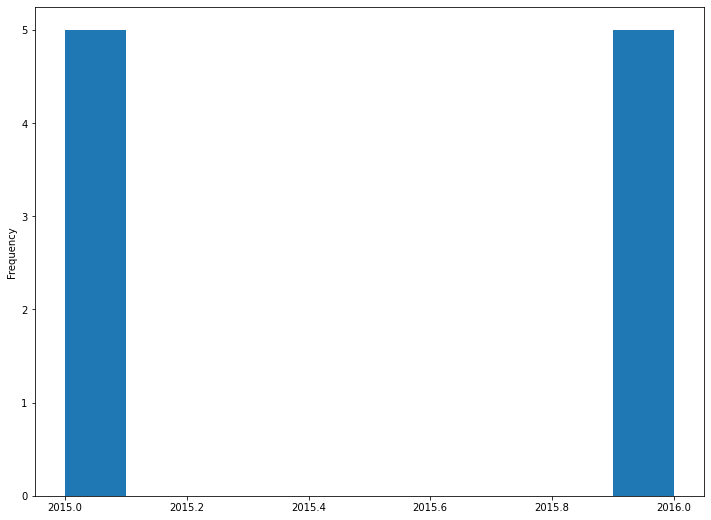

In [13]:
#year distribution
print(df["year"].value_counts())
df["year"].plot(kind='hist', figsize=(12,9))

**********
COLUMN: gender
Unisex    10
Name: gender, dtype: int64


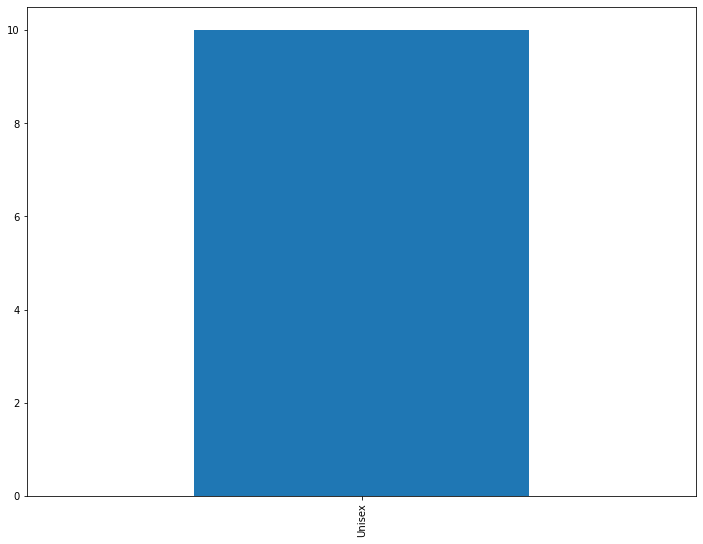

**********
COLUMN: masterCategory
Accessories    9
Footwear       1
Name: masterCategory, dtype: int64


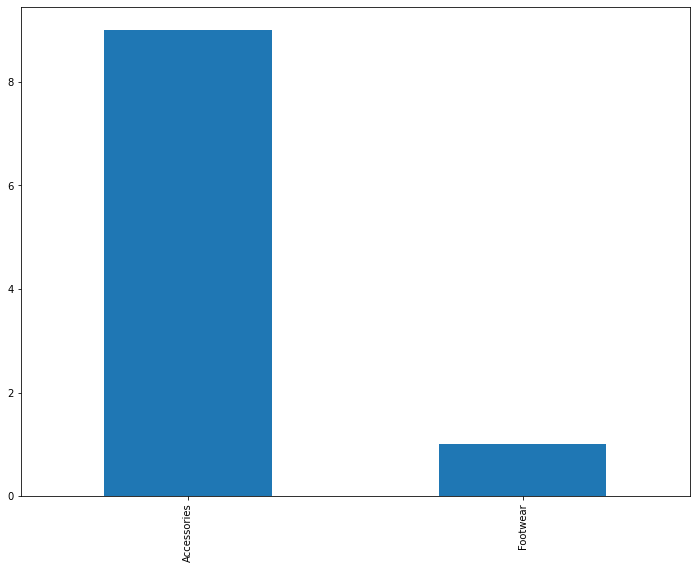

**********
COLUMN: subCategory
Bags          4
Watches       3
Eyewear       2
Flip Flops    1
Name: subCategory, dtype: int64


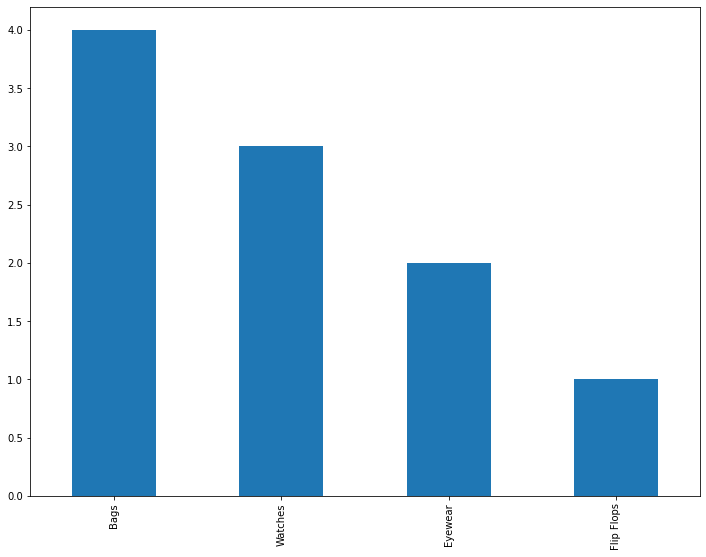

**********
COLUMN: articleType
Watches       3
Backpacks     2
Sunglasses    2
Duffel Bag    2
Flip Flops    1
Name: articleType, dtype: int64


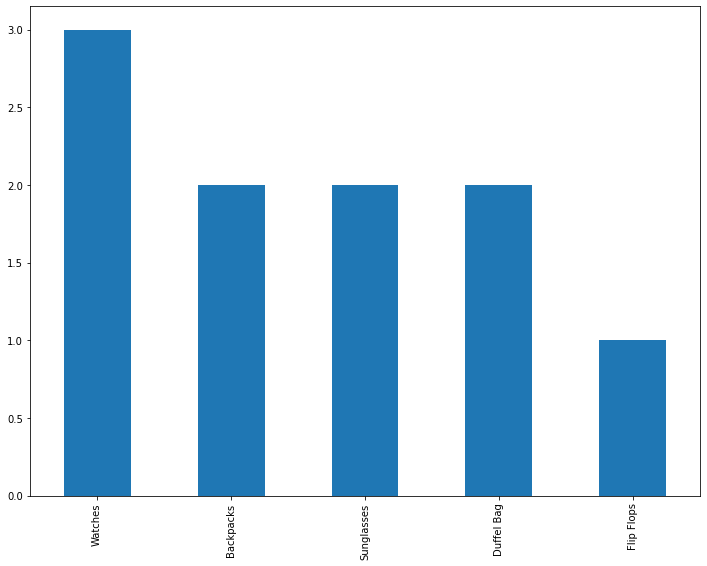

**********
COLUMN: baseColour
Black        4
Brown        2
Red          1
Grey         1
White        1
Navy Blue    1
Name: baseColour, dtype: int64


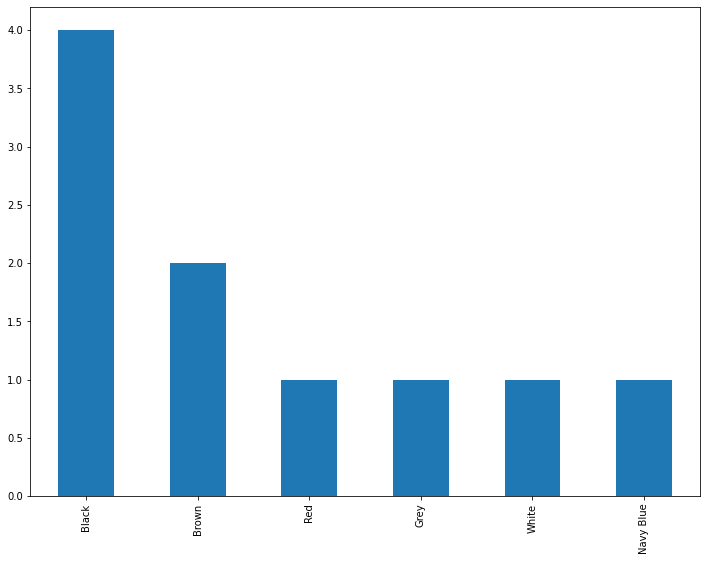

**********
COLUMN: season
Winter    9
Summer    1
Name: season, dtype: int64


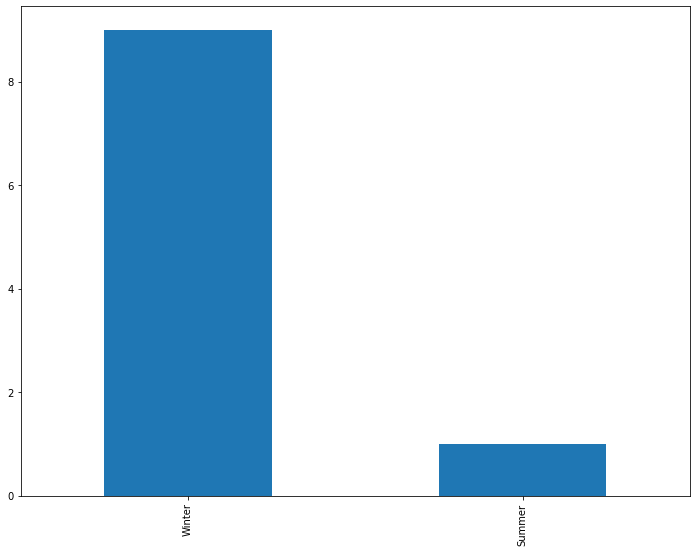

**********
COLUMN: usage
Casual    9
Sports    1
Name: usage, dtype: int64


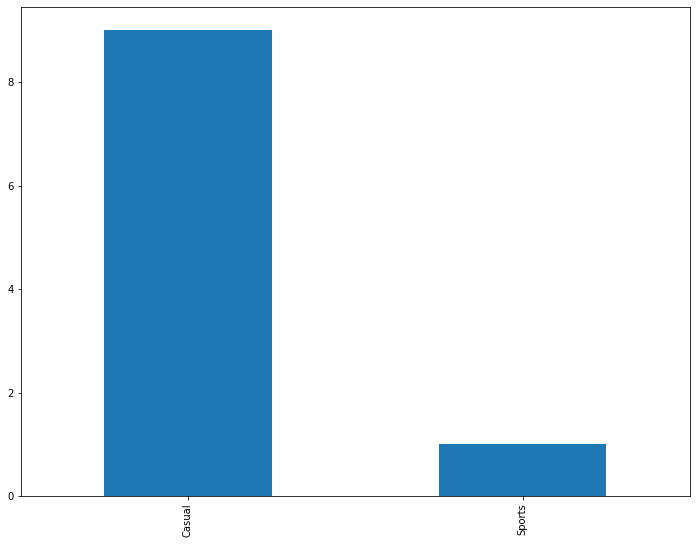

In [14]:
#gender distribution
#all_metadata["gender"].plot(kind='hist', figsize=(12,9))


for col in ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'usage']:
    print("*"*10)
    print(f"COLUMN: {col}")
    print(df[col].value_counts())
    df[col].value_counts().plot(kind='bar', figsize=(12,9))
    plt.show()

0 19915


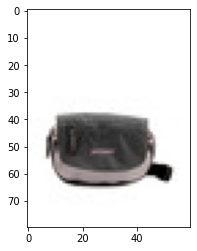

id                                                   19915
gender                                              Unisex
masterCategory                                 Accessories
subCategory                                           Bags
articleType                                    Waist Pouch
baseColour                                            Pink
season                                              Winter
year                                                  2015
usage                                               Casual
productDisplayName       Wildcraft Unisex Pink Waist Pouch
file_url              data/fashion-small//images/19915.jpg
Name: 0, dtype: object
*********************************
0 15866


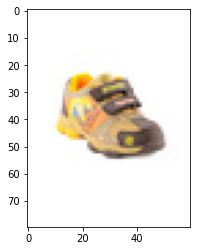

id                                                                15866
gender                                                           Unisex
masterCategory                                                 Footwear
subCategory                                                       Shoes
articleType                                                Casual Shoes
baseColour                                                        Brown
season                                                           Spring
year                                                               2013
usage                                                            Casual
productDisplayName    Warner Bros Kids Unisex SD Silly Shoe Brown Ca...
file_url                           data/fashion-small//images/15866.jpg
Name: 0, dtype: object
*********************************
0 13177


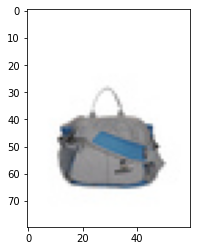

id                                                                13177
gender                                                           Unisex
masterCategory                                              Accessories
subCategory                                                        Bags
articleType                                                 Waist Pouch
baseColour                                                         Blue
season                                                           Winter
year                                                               2015
usage                                                            Casual
productDisplayName    Wildcraft Unisex Blue & Grey Convertable Sling...
file_url                           data/fashion-small//images/13177.jpg
Name: 0, dtype: object
*********************************
0 17607


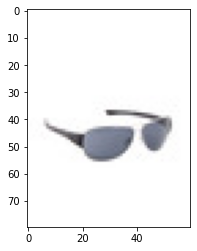

id                                                   17607
gender                                              Unisex
masterCategory                                 Accessories
subCategory                                        Eyewear
articleType                                     Sunglasses
baseColour                                          Silver
season                                              Winter
year                                                  2016
usage                                               Casual
productDisplayName     Cat Unisex Classic Steal Sunglasses
file_url              data/fashion-small//images/17607.jpg
Name: 0, dtype: object
*********************************
0 17646


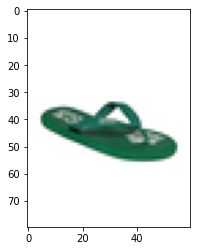

id                                                   17646
gender                                              Unisex
masterCategory                                    Footwear
subCategory                                     Flip Flops
articleType                                     Flip Flops
baseColour                                           Green
season                                              Spring
year                                                  2013
usage                                               Casual
productDisplayName        Converse Unisex Green Flip Flops
file_url              data/fashion-small//images/17646.jpg
Name: 0, dtype: object
*********************************
0 15880


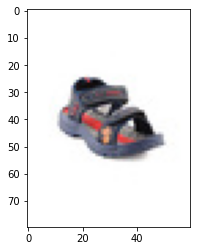

id                                                                15880
gender                                                           Unisex
masterCategory                                                 Footwear
subCategory                                                      Sandal
articleType                                                     Sandals
baseColour                                                    Navy Blue
season                                                           Spring
year                                                               2013
usage                                                            Casual
productDisplayName    Warner Bros Kids Unisex TJ Jerry  Navy Blue Sa...
file_url                           data/fashion-small//images/15880.jpg
Name: 0, dtype: object
*********************************
0 16774


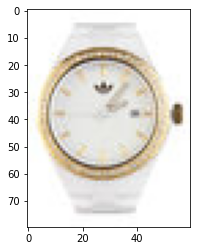

id                                                               16774
gender                                                          Unisex
masterCategory                                             Accessories
subCategory                                                    Watches
articleType                                                    Watches
baseColour                                                       White
season                                                          Winter
year                                                              2016
usage                                                           Casual
productDisplayName    ADIDAS Originals Unisex White Dial Watch ADH2127
file_url                          data/fashion-small//images/16774.jpg
Name: 0, dtype: object
*********************************
0 16893


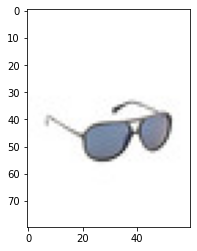

id                                                    16893
gender                                               Unisex
masterCategory                                  Accessories
subCategory                                         Eyewear
articleType                                      Sunglasses
baseColour                                            Black
season                                               Winter
year                                                   2016
usage                                                Casual
productDisplayName    Police Unisex Casual Black Sunglasses
file_url               data/fashion-small//images/16893.jpg
Name: 0, dtype: object
*********************************
0 15878


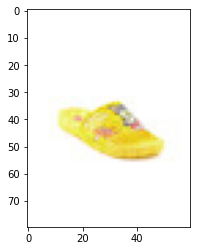

id                                                                15878
gender                                                           Unisex
masterCategory                                                 Footwear
subCategory                                                  Flip Flops
articleType                                                  Flip Flops
baseColour                                                       Yellow
season                                                           Winter
year                                                               2013
usage                                                            Casual
productDisplayName    Warner Bros Kids Unisex TJ Big Face Yellow Sli...
file_url                           data/fashion-small//images/15878.jpg
Name: 0, dtype: object
*********************************
0 17334


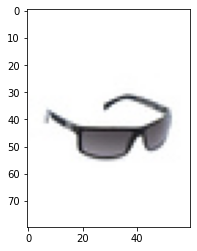

id                                                   17334
gender                                              Unisex
masterCategory                                 Accessories
subCategory                                        Eyewear
articleType                                     Sunglasses
baseColour                                           Brown
season                                              Winter
year                                                  2016
usage                                               Casual
productDisplayName     Pepe Jeans Unisex Casual Sunglasses
file_url              data/fashion-small//images/17334.jpg
Name: 0, dtype: object
*********************************


In [36]:
#display random 10 images and print details

for index, row in df.sample(n = 10).iterrows():
    print(index, row['id'])
    plt.imshow(plt.imread(os.path.join(os.environ["PYTHONPATH"], row['file_url'])))
    plt.show()
    print(row)
    print("*"*33)
        

In [20]:
#apply augmentations to images
import cv2
from utils.ImageAugmentation import ImageAugmentation

In [21]:
img_aug = ImageAugmentation()

0 51693


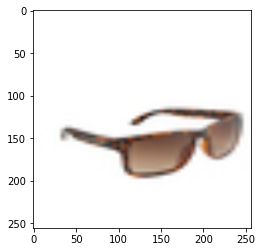

*********************************
0 5254


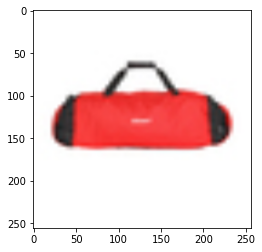

*********************************
0 4716


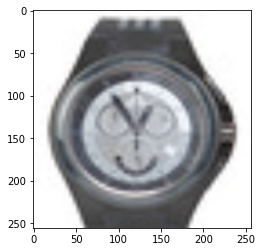

*********************************
0 22950


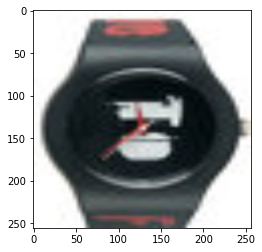

*********************************
0 8746


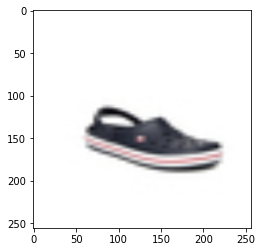

*********************************
0 13841


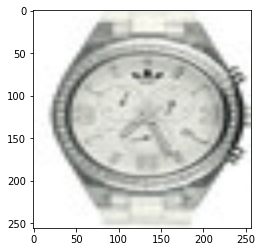

*********************************
0 19920


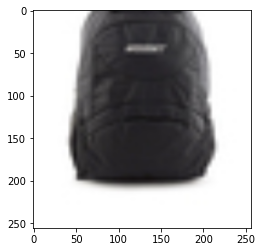

*********************************
0 5253


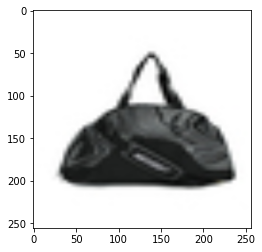

*********************************
0 19918


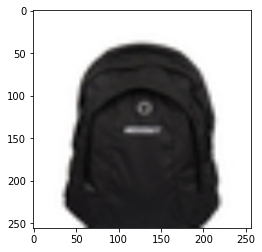

*********************************
0 51694


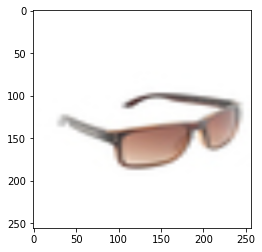

*********************************


In [22]:
#display random 10 images(w. augmentations) and print details

for index, row in df.sample(n = 10).iterrows():
    print(index, row['id'])
    image_path = os.path.join(os.environ["PYTHONPATH"], row['file_url'])
    transformed_img = img_aug.random_resized_crop(image_path=image_path,
                             width=256, height=256, scale=(0.8, 0.8))
    cv2.imwrite('test.jpg', transformed_img[:,:,::-1]) #rgb to bgr
    plt.imshow(transformed_img) 
    plt.show()
    print("*"*33)
        

## run model on random 10 sample

In [24]:
from utils.ModelInference import ModelInference

In [25]:
#init model
model = ModelInference()

/home/tai-user/Documents/AI/playground/0_ml_data_pipeline/code/utils/ModelInference.py:27: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.model_category_cloth = pd.read_csv(os.environ.get('PYTHONPATH')+'/config/list_category_cloth.txt', delimiter=r'[ \t]{2,}', header=1, usecols=["category_name", "category_type"])
/home/tai-user/Documents/AI/playground/0_ml_data_pipeline/code/utils/ModelInference.py:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.model_attr_cloth = pd.read_csv(os.environ.get('PYTHONPATH')+'/config/list_attr_cloth.txt', delimiter=r'[ \t]{2,}', header=1, usecols=["attribute_name

0 22950


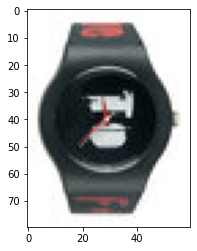

<class 'pandas.core.series.Series'>
*********************************
0 8746


/home/tai-user/Documents/venvs/cv43-py36/lib/python3.6/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


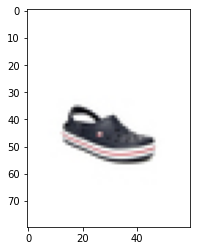

<class 'pandas.core.series.Series'>
*********************************
0 51693


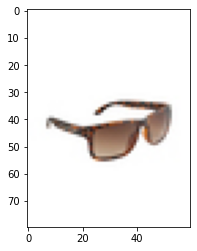

<class 'pandas.core.series.Series'>
*********************************
0 19918


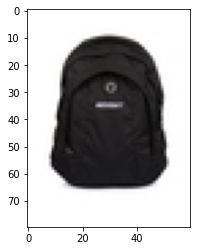

<class 'pandas.core.series.Series'>
*********************************
0 5254


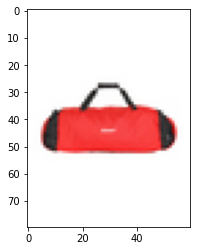

<class 'pandas.core.series.Series'>
*********************************
0 13841


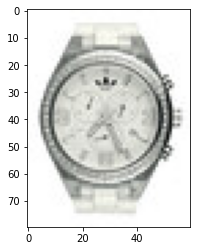

<class 'pandas.core.series.Series'>
*********************************
0 51694


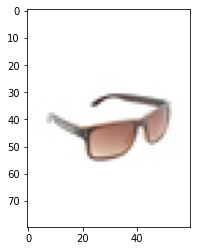

<class 'pandas.core.series.Series'>
*********************************
0 4716


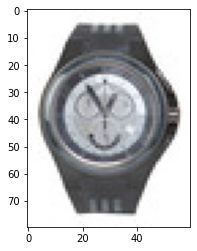

<class 'pandas.core.series.Series'>
*********************************
0 5253


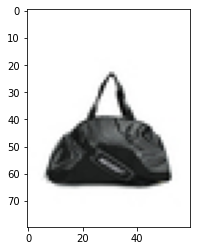

<class 'pandas.core.series.Series'>
*********************************
0 19920


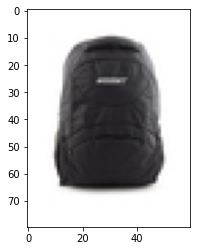

<class 'pandas.core.series.Series'>
*********************************


In [28]:
#run inference on 10 images and update jsons

#assign none to new columns 
df['fashionnet_category_name'] = None
df['fashionnet_category_type'] = None
df['fashionnet_attribute_name'] = None
df['fashionnet_attribute_type'] = None


for index, row in df.sample(n = 10).iterrows():
    print(index, row['id'])
    image_path = os.path.join(os.environ["PYTHONPATH"], row['file_url'])
    plt.imshow(plt.imread(image_path))
    plt.show()
    out = model.predict(image_path)
    df.loc[df.id == row['id'], 'fashionnet_category_name'] = out['category_name']
    df.loc[df.id == row['id'], 'fashionnet_category_type'] = out['category_type']
    df.loc[df.id == row['id'], 'fashionnet_attribute_name'] = out['attribute_name']
    df.loc[df.id == row['id'], 'fashionnet_attribute_type'] = out['attribute_type']
   
    print(type(row))
    
    print("*"*33)   



In [27]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,file_url,fashionnet_category_name,fashionnet_category_type,fashionnet_attribute_name,fashionnet_attribute_type
0,13841,Unisex,Accessories,Watches,Watches,White,Winter,2016.0,Casual,ADIDAS Unisex Three Small Dials White Watches,data/fashion-small//images/13841.jpg,Parka,1,gauze maxi,3
0,19918,Unisex,Accessories,Bags,Backpacks,Black,Winter,2015.0,Casual,Wildcraft Unisex Black Backpack,data/fashion-small//images/19918.jpg,Blouse,1,bike,5
0,19920,Unisex,Accessories,Bags,Backpacks,Black,Winter,2015.0,Casual,Wildcraft Unisex Black Outdoor Backpack,data/fashion-small//images/19920.jpg,Blouse,1,lace peplum,4
0,22950,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Fastrack Unisex Black Dial Watch 9915PP13,data/fashion-small//images/22950.jpg,Blouse,1,neck ribbed,4
0,4716,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Response ST Analogue Black Watch,data/fashion-small//images/4716.jpg,Blouse,1,gauze maxi,3
0,51693,Unisex,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,Van Heusen Unisex Brown Sunglasses,data/fashion-small//images/51693.jpg,Coverup,3,neck ribbed,4
0,51694,Unisex,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,Van Heusen Unisex Sunglasses VH216-C2,data/fashion-small//images/51694.jpg,Parka,1,neck ribbed,4
0,5253,Unisex,Accessories,Bags,Duffel Bag,Grey,Winter,2015.0,Casual,Wildcraft Unisex Black & Grey Duffel Bag,data/fashion-small//images/5253.jpg,Blouse,1,gauze maxi,3
0,5254,Unisex,Accessories,Bags,Duffel Bag,Red,Winter,2015.0,Casual,Wildcraft Unisex Red Duffle Bag,data/fashion-small//images/5254.jpg,Blouse,1,neck ribbed,4
0,8746,Unisex,Footwear,Flip Flops,Flip Flops,Navy Blue,Summer,2015.0,Casual,Crocs Kids Navy Blue Clogs,data/fashion-small//images/8746.jpg,Blouse,1,van,5


In [ ]:
#TODO: save updated df to as json files! 
#TODO: upload new files to s3